# LSTM RNN Models For Univariate Time Series Forecasting- Deep Learning

https://www.youtube.com/watch?v=UbvkhuqVqUI&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=79
    
https://github.com/krishnaik06/Time-Series-Forecasting
    
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Bidirectional

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# # preparing independent and dependent features
# def prepare_data(timeseries_data, n_features):
# 	X, y =[],[]
# 	for i in range(len(timeseries_data)):
# 		# find the end of this pattern
# 		end_ix = i + n_features
# 		# check if we are beyond the sequence
# 		if end_ix > len(timeseries_data)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [6]:
X.shape

(6, 3)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fir model
model.fit(X, y, epochs=300, verbose=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:

# # define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=300, verbose=1) ### NOTE: verbose=0 it will NOT print messages


### Predicting For the next 10 data

In [11]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[231.14151]
1 day input [196.         210.         231.14151001]
1 day output [[245.38777]]
2 day input [210.         231.14151001 245.38777161]
2 day output [[264.53098]]
3 day input [231.14151 245.38777 264.53098]
3 day output [[286.30777]]
4 day input [245.38777 264.53098 286.30777]
4 day output [[305.92905]]
5 day input [264.53098 286.30777 305.92905]
5 day output [[329.3379]]
6 day input [286.30777 305.92905 329.3379 ]
6 day output [[354.65118]]
7 day input [305.92905 329.3379  354.65118]
7 day output [[380.12286]]
8 day input [329.3379  354.65118 380.12286]
8 day output [[408.87234]]
9 day input [354.65118 380.12286 408.87234]
9 day output [[439.45273]]
[231.14151, 245.38777, 264.53098, 286.30777, 305.92905, 329.3379, 354.65118, 380.12286, 408.87234, 439.45273]


In [12]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
len(timeseries_data)

9

In [14]:
lst_output

[231.14151,
 245.38777,
 264.53098,
 286.30777,
 305.92905,
 329.3379,
 354.65118,
 380.12286,
 408.87234,
 439.45273]

### Visualizaing The Output

In [15]:
import matplotlib.pyplot as plt

In [16]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

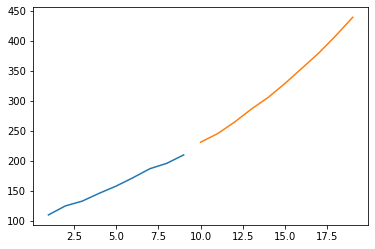

In [17]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
